In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io

In [16]:
#load real data 1
data=io.loadmat('../data/data_1.mat')

In [17]:
directions=data['directions']
xyz=data['xyz']
src=data['src_model']
S=data['S']

directions,S.shape

(array([[ 92.3, 225.3],
        [ 92.5, 225.2],
        [ 92.6, 224.9],
        [ 92.6, 225.8],
        [ 92.5, 225.3],
        [ 92.5, 224.5],
        [ 92.6, 223.3],
        [ 92.5, 225.7],
        [ 92.3, 225.5],
        [ 92.5, 224.8]]),
 (10, 19, 19))

In [18]:
lambda_ = 0.336845458426966
sigma = 0.1
N=src.shape[0]
C0 = 0.8
B = 2e6/N
r=src[:,0:2].T
r.shape

(2, 121)

In [19]:
R_user = np.zeros(directions.shape+(121,))
R_user.shape

(10, 2, 121)

In [20]:
#calculate the received throughput of each user and print the avg
for i in range(directions.shape[0]):
    for j in range(directions.shape[1]):
        angle=directions[i,j]/360*2*np.pi
        a=np.exp(-1j*2*np.pi/lambda_*(xyz@[np.cos(angle),np.sin(angle)])).reshape(xyz.shape[0],-1)
        w=np.dot(np.linalg.inv(S[i]),a)/(np.dot(a.conj().T,np.dot(np.linalg.inv(S[i]),a)))
        w=w/np.sqrt(np.sum(abs(w)**2))
        b_gain=abs(w[:,0]@np.exp(1j*2*np.pi*np.dot(xyz,r)/(lambda_)))
        for k in range(N):
            R_user[i,j,k]=B*np.log2(1+(b_gain[i]**2/2)/sigma*C0)

R_aver=np.mean(R_user)
R_aver

40307.68031627932

92.30000000000001


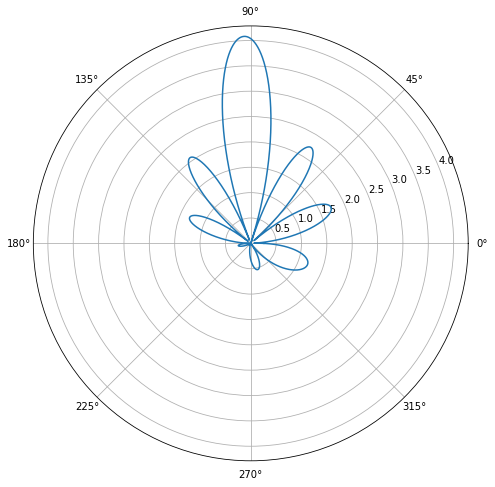

In [21]:
#show the throughput of the first time slot
N=10000
thetas=np.linspace(0,2*np.pi,N)
r=np.array([np.cos(thetas),np.sin(thetas)])
print(directions[0,0])
angle=directions[0,0]/360*2*np.pi
a=np.exp(-1j*2*np.pi/lambda_*(xyz@[np.cos(angle),np.sin(angle)])).reshape(xyz.shape[0],-1)
w=np.dot(np.linalg.inv(S[i]),a)/(np.dot(a.conj().T,np.dot(np.linalg.inv(S[i]),a)))
w=w/np.sqrt(np.sum(abs(w)**2))
b_gain=abs(w[:,0]@np.exp(1j*2*np.pi*np.dot(xyz,r)/(lambda_)))

plt.figure(figsize=(10,8))
plt.polar()
plt.plot(np.arange(N)/N*2*np.pi,b_gain)
plt.show()

In [28]:
#load real data 2
data=io.loadmat('../data/data_2.mat')

In [29]:
directions=data['directions'][0]
xyz=data['xyz']
src=data['src_model']
S=data['S']
lambda_ = 0.336845458426966
sigma = 0.1
N=src.shape[0]
C0 = 0.8
B = 2e6/N
r=src[:,0:2].T
r.shape
directions,S.shape

(array([array([[ 88.7, 231.6]]), array([[ 88.6, 231.8]]),
        array([[ 88.4, 231.8]]), array([[ 88.2, 230.6]]),
        array([[ 88.7, 190.3, 231.6]]), array([[ 88.5, 232.7]]),
        array([[ 88.6, 231.6]]), array([[ 88.6, 231. ]]),
        array([[ 88.5, 191.5, 231.7]]), array([[ 88.5, 192. , 230.8]])],
       dtype=object),
 (10, 15, 15))

In [30]:
#calculate the received throughput of each user and print the avg
R_user = []
for i,direction in enumerate(directions):
    for j,angle in enumerate(direction[0]):
        angle=angle/360*2*np.pi
        a=np.exp(-1j*2*np.pi/lambda_*(xyz@[np.cos(angle),np.sin(angle)])).reshape(xyz.shape[0],-1)
        w=np.dot(np.linalg.inv(S[i]),a)/(np.dot(a.conj().T,np.dot(np.linalg.inv(S[i]),a)))
        w=w/np.sqrt(np.sum(abs(w)**2))
        b_gain=abs(w[:,0]@np.exp(1j*2*np.pi*np.dot(xyz,r)/(lambda_)))
        for k in range(N):
            R_user.append(B*np.log2(1+(b_gain[i]**2/2)/sigma*C0))

R_aver=np.mean(R_user)
R_aver

40276.527543112265

231.60000000000002


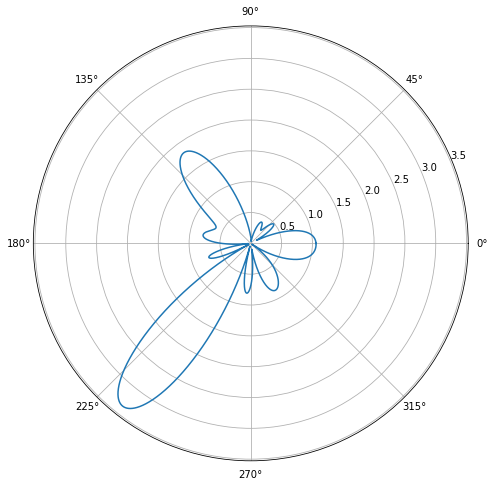

In [31]:
#show the throughput of the first time slot
N=10000
thetas=np.linspace(0,2*np.pi,N)
r=np.array([np.cos(thetas),np.sin(thetas)])
print(directions[0][0][1])
angle=directions[0][0][1]/360*2*np.pi
a=np.exp(-1j*2*np.pi/lambda_*(xyz@[np.cos(angle),np.sin(angle)])).reshape(xyz.shape[0],-1)
w=np.dot(np.linalg.inv(S[i]),a)/(np.dot(a.conj().T,np.dot(np.linalg.inv(S[i]),a)))
w=w/np.sqrt(np.sum(abs(w)**2))
b_gain=abs(w[:,0]@np.exp(1j*2*np.pi*np.dot(xyz,r)/(lambda_)))

plt.figure(figsize=(10,8))
plt.polar()
plt.plot(np.arange(N)/N*2*np.pi,b_gain)
plt.show()